# 1. 生成数据表

两种数据结构：
+ Series
+ DataFrame

安装：
+ pip install pandas

生成数据表的方法：
+ 一般会通过读取文件获取数据表；
+ 通过dict、list或ndarray等构造DataFrame

首先是引入pandas和numpy，这是经常配合使用的两个包，pandas依赖于numpy，引入以后我们可以直接使用np/pd来表示这个两个模块

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

## 1.1 读取数据

pandas提供了一些用于将表格型数据读取为DataFrame对象的函数。用的比较多的是read_table和read_csv，两者用法差不多，这里主要介绍read_csv。

用read_csv函数可以读取csv数据，默认数据之间是用逗号分隔开的。有时候数据集并不是这样的，咱们先看看比较完整的读数据参数设定。

In [3]:
# import os
# os.getcwd()
data = pd.read_csv('bikes.csv',encoding='latin1',sep=';',dtype={'Berri 1':'int64'})
data.head()

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN
3,04/01/2012,144,NaN,1,116,318,111,8,61,NaN
4,05/01/2012,197,NaN,2,124,330,97,13,95,NaN


In [24]:
data=pd.read_csv('bikes.csv',encoding='latin1',sep=';',parse_dates=['Date'],header=0,index_col='Date')
data.head(10)
# data.columns#列索引
# data.index#行索引

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-02-01,83,NaN,1,68,153,53,6,43,NaN
2012-03-01,135,NaN,2,104,248,89,3,58,NaN
2012-04-01,144,NaN,1,116,318,111,8,61,NaN
2012-05-01,197,NaN,2,124,330,97,13,95,NaN
2012-06-01,146,NaN,0,98,244,86,4,75,NaN
2012-07-01,98,NaN,2,80,108,53,6,54,NaN
2012-08-01,95,NaN,1,62,98,64,11,63,NaN
2012-09-01,244,NaN,2,165,432,198,12,173,NaN


In [14]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)


In [ ]:
help(pd.read_csv)

In [ ]:
data

读取的数据完全不对。需要对read_csv内部相应的参数进行相应的设置,read_csv有相应的参数需要我们设定一下，参数的具体见[官方文档](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html#pandas.read_table)。对于上面的数据：
+ 分隔符需要用到‘;’
+ 编码类型是‘latin1’,系统默认的是‘utf-8’
+ 有时间字段，需要对时间字段进行解析，并且进行排序

In [ ]:
fixed_df = pd.read_csv('bikes.csv', sep=';',  parse_dates=['Date'],encoding='latin1',header=0, dayfirst=True, index_col='Date')

In [ ]:
fixed_df 

In [ ]:
fixed_df.tail()#前面5行

In [ ]:
fixed_df.columns

也存在其他更加高效的磁盘存储格式（如json、xml、excel等），加载数据库中的数据，或者利用Web API操作网络资源等方式，详情点击[这里](http://pandas.pydata.org/pandas-docs/stable/api.html#input-output)。 

## 1.2 用pandas创建数据表

构造DataFrame的办法有很多，最常用的一种就是直接传入一个由等长列表或者Numpy数组组成的字典。

In [24]:
from pandas import DataFrame
import numpy as np

data = {'id':[1001,1002,1003,1004,1005,1006], 
        'date':pd.date_range('20130102', periods=6),
        'city':['Beijing ', 'SH', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
        'age':[23,44,54,32,34,32],
        'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
        'price':[1200,np.nan,2133,5433,np.nan,4432]}
index = ['one','two','three','four','five','six']
pd.DataFrame(data,index=index)

,age,category,city,date,id,price
one,23,100-A,Beijing,2013-01-02,1001,1200.0
two,44,100-B,SH,2013-01-03,1002,NaN
three,54,110-A,guangzhou,2013-01-04,1003,2133.0
four,32,110-C,Shenzhen,2013-01-05,1004,5433.0
five,34,210-A,shanghai,2013-01-06,1005,NaN
six,32,130-F,BEIJING,2013-01-07,1006,4432.0


In [35]:
d = pd.DataFrame(data,index=index)
d.to_csv('city.csv',index=False) #写入到csv文件里面，不用行索引
d.to_excel('city.xls',index=index,sheet_name='abc') #写入到excel文件里面，用了行索引,指定了sheet_name

In [43]:
a=list(np.arange(12).reshape(3,4))
d=DataFrame(a,index=['one','two','three'],columns=['a','b','c','d'])
d

,a,b,c,d
one,0,1,2,3
two,4,5,6,7
three,8,9,10,11


结果中DataFrame会自动加上行索引，而且列索引会进行有序排序。

指定列顺序,如果在列中找不到，就会产生NA值。行索引必须跟数据的长度匹配。

In [27]:
col=list(data.keys())
col.append('debt') #添加debt列
col
d=DataFrame(data,index=list('abcdef'),columns=col)
d

,id,date,city,age,category,price,debt
a,1001,2013-01-02,Beijing,23,100-A,1200.0,NaN
b,1002,2013-01-03,SH,44,100-B,NaN,NaN
c,1003,2013-01-04,guangzhou,54,110-A,2133.0,NaN
d,1004,2013-01-05,Shenzhen,32,110-C,5433.0,NaN
e,1005,2013-01-06,shanghai,34,210-A,NaN,NaN
f,1006,2013-01-07,BEIJING,32,130-F,4432.0,NaN


In [45]:
d.values

array([[1001, Timestamp('2013-01-02 00:00:00'), 'Beijing ', 23, '100-A',
        1200.0, nan],
       [1002, Timestamp('2013-01-03 00:00:00'), 'SH', 44, '100-B', nan,
        nan],
       [1003, Timestamp('2013-01-04 00:00:00'), ' guangzhou ', 54,
        '110-A', 2133.0, nan],
       [1004, Timestamp('2013-01-05 00:00:00'), 'Shenzhen', 32, '110-C',
        5433.0, nan],
       [1005, Timestamp('2013-01-06 00:00:00'), 'shanghai', 34, '210-A',
        nan, nan],
       [1006, Timestamp('2013-01-07 00:00:00'), 'BEIJING ', 32, '130-F',
        4432.0, nan]], dtype=object)

In [ ]:
pd.DataFrame(data,columns =['id','date','city','category','age','price','debt'],index=['one','two','three','four','five','six'])

In [ ]:
s=pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)),columns=['a', 'b', 'c', 'd', 'e'],index=['one','two','three','four','five'])

In [ ]:
s.values

更多的构造DataFrame方法见[官方文档](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)。

## 1.3 另一种数据结构Series

Series类似于一维数组的对象，它由一组数据和一组与之相关的标签组成。

In [52]:
type(d['price'])

pandas.core.series.Series

In [28]:
dic1 = {'a':1,'b':2,'c':3} #通过字典构建Series
s = pd.Series(dic1)
s

a    1
b    2
c    3
dtype: int64

In [29]:
print(s.index)
print(s.values)

Index(['a', 'b', 'c'], dtype='object')
[1 2 3]


In [30]:
obj=pd.Series([1,2,3,4],index=list('abcd'))
obj.values

array([1, 2, 3, 4], dtype=int64)

In [31]:
obj = pd.Series([5,4,-3,1,-4],dtype='int32')
print(obj)

0    5
1    4
2   -3
3    1
4   -4
dtype: int32


In [ ]:
obj.values

In [ ]:
obj.index

我们希望Series每个值对应一个标签：

In [ ]:
obj = pd.Series([5,4,-3,1,-4],index=['a','b','c','e','d'])
print(obj)

也可以通过字典去构建Series：

In [55]:
sdata={'Shenzhen':10000,'Guangzhou':9500,'Shanghai':11000,'Beijing':11000}
pd.Series(sdata)

Beijing      11000
Guangzhou     9500
Shanghai     11000
Shenzhen     10000
dtype: int64

In [58]:
sdata={'Shenzhen':10000,'Guangzhou':9500,'Shanghai':11000,'Beijing':11000}
pdata = pd.Series(sdata)
print(pdata.shape)

(4,)


# 2. 信息查看和索引

## 2.1 查看属性和基础数据

可以通过以下的函数获取DataFrame的基本属性和基础数据，详情点击[这里](http://pandas.pydata.org/pandas-docs/stable/api.html#attributes-and-underlying-data)：

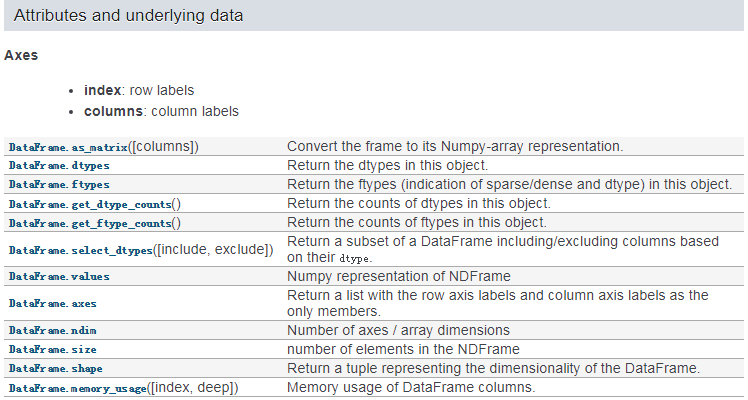

数据表的基本属性包括形状、数据类型、数据信息等

In [62]:
#构造一个DataFrame
df = pd.DataFrame({'id':[1001,1002,1003,1004,1005,1006], 
                   'date':pd.date_range('20130102', periods=6),
                   'city':['Beijing ', 'ShangHai', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
                   'age':[23,44,54,32,34,32],
                   'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
                   'price':[1200,np.nan,2133,5433,np.nan,4432]},columns =['id','date','city','category','age','price'])
#查看数据表的相关属性
print(df)
print(df.shape)#查看DataFrame的形状
# print(df.size)#查看表内所有数据数量
print(df.info())#表的信息,（维度、列名称、数据格式、所占空间等）
print(df.dtypes)#表的所有列的类型
print(df['id'].dtypes)#表中某一列的数据类型

     id       date         city category  age   price
0  1001 2013-01-02     Beijing     100-A   23  1200.0
1  1002 2013-01-03     ShangHai    100-B   44     NaN
2  1003 2013-01-04   guangzhou     110-A   54  2133.0
3  1004 2013-01-05     Shenzhen    110-C   32  5433.0
4  1005 2013-01-06     shanghai    210-A   34     NaN
5  1006 2013-01-07     BEIJING     130-F   32  4432.0
(6, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
id          6 non-null int64
date        6 non-null datetime64[ns]
city        6 non-null object
category    6 non-null object
age         6 non-null int64
price       4 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 368.0+ bytes
None
id                   int64
date        datetime64[ns]
city                object
category            object
age                  int64
price              float64
dtype: object
int64


In [64]:
df['id']=df['id'].astype('float32') 
df

,id,date,city,category,age,price
0,1001.0,2013-01-02,Beijing,100-A,23,1200.0
1,1002.0,2013-01-03,ShangHai,100-B,44,NaN
2,1003.0,2013-01-04,guangzhou,110-A,54,2133.0
3,1004.0,2013-01-05,Shenzhen,110-C,32,5433.0
4,1005.0,2013-01-06,shanghai,210-A,34,NaN
5,1006.0,2013-01-07,BEIJING,130-F,32,4432.0


In [65]:
#查看表的相关基础数据
print(df.values)#数据表内的值
print(df.index)#数据表的行索引
print(df.columns)#数据表的列名称

[[1001.0 Timestamp('2013-01-02 00:00:00') 'Beijing ' '100-A' 23 1200.0]
 [1002.0 Timestamp('2013-01-03 00:00:00') 'ShangHai' '100-B' 44 nan]
 [1003.0 Timestamp('2013-01-04 00:00:00') ' guangzhou ' '110-A' 54 2133.0]
 [1004.0 Timestamp('2013-01-05 00:00:00') 'Shenzhen' '110-C' 32 5433.0]
 [1005.0 Timestamp('2013-01-06 00:00:00') 'shanghai' '210-A' 34 nan]
 [1006.0 Timestamp('2013-01-07 00:00:00') 'BEIJING ' '130-F' 32 4432.0]]
RangeIndex(start=0, stop=6, step=1)
Index(['id', 'date', 'city', 'category', 'age', 'price'], dtype='object')


## 2.2 数据表的索引和选取

**选取单列或多个列**

(1) 直接根据列名来选取

In [71]:
df = pd.DataFrame({'id':[1001,1002,1003,1004,1005,1006], 
                   'date':pd.date_range('20130102', periods=6),
                   'city':['Beijing ', 'SH', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
                   'age':[23,44,54,32,34,32],
                   'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
                   'price':[1200,np.nan,2133,5433,np.nan,4432]},columns =['id','date','city','category','age','price'],
                   index = ['one','two','three','four','five','six'])
df[['city','price','id']]

,city,price,id
one,Beijing,1200.0,1001
two,SH,NaN,1002
three,guangzhou,2133.0,1003
four,Shenzhen,5433.0,1004
five,shanghai,NaN,1005
six,BEIJING,4432.0,1006


In [13]:
df = pd.DataFrame({'id':[1001,1002,1003,1004,1005,1006], 
                   'date':pd.date_range('20130102', periods=6),
                   'city':['Beijing ', 'SH', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
                   'age':[23,44,54,32,34,32],
                   'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
                   'price':[1200,np.nan,2133,5433,np.nan,4432]},columns =['id','date','city','category','age','price'],
                   index = ['one','two','three','four','five','six'])
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [ ]:
df[['id','city','age']]

**选取行的方法，相对来说比较丰富**

In [80]:
df.iloc[:2,[2,4,3]]

,city,age,category
one,Beijing,23,100-A
two,SH,44,100-B


In [84]:
df.loc[['three','one']].iloc[:,[2,0]]

,city,id
three,guangzhou,1003
one,Beijing,1001


（1）通过切片或者布尔型数组选取行

In [ ]:
df.iloc[:2]#通过切片

In [91]:
d=df[df['age']>30]
d['city']

two               SH
three     guangzhou 
four        Shenzhen
five        shanghai
six         BEIJING 
Name: city, dtype: object

In [42]:
d = df.loc[df['age']>30]
d['city']

two               SH
three     guangzhou 
four        Shenzhen
five        shanghai
six         BEIJING 
Name: city, dtype: object

In [90]:
df[df['age']>30][['id','city']]

,id,city
two,1002,SH
three,1003,guangzhou
four,1004,Shenzhen
five,1005,shanghai
six,1006,BEIJING


In [93]:
df[(df['age']>30) & (df['age']<40)]#通过布尔型数组选取行，是DataFrame在语法上更像ndarray

,id,date,city,category,age,price
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


(2) 通过obj.ix[val]，val可以使切片方法，可以是布尔判断，可以是行索引列。

In [ ]:
df.ix[df.age>40]

也可以通过ix同时选取行和列

（3）通过iloc或loc选取行

In [ ]:
df.loc[['one','two'],['id','city']]#loc接受的是索引

In [ ]:
df.iloc[:,:3]#iloc根据行号来索引

同时选取行和列

In [ ]:
df

In [ ]:
df.ix[['two','one','three'],[3,0,1]]

In [ ]:
df.loc[['two','one','three']].iloc[:,[3,0,1]]

(4) 通过obj.head()和obj.tail()查看行

In [43]:
df.loc[['one','two'],['id']]

,id
one,1001
two,1002


In [96]:
df.tail() #默认后5行数据

,id,date,city,category,age,price
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [98]:
df.head()#默认前5行

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN


In [ ]:
df.tail(2) #默认后5行数据

Pandas为我们提供的索引方法如下图，更详细的信息点击[这里](http://pandas.pydata.org/pandas-docs/stable/api.html#attributes-and-underlying-data)。

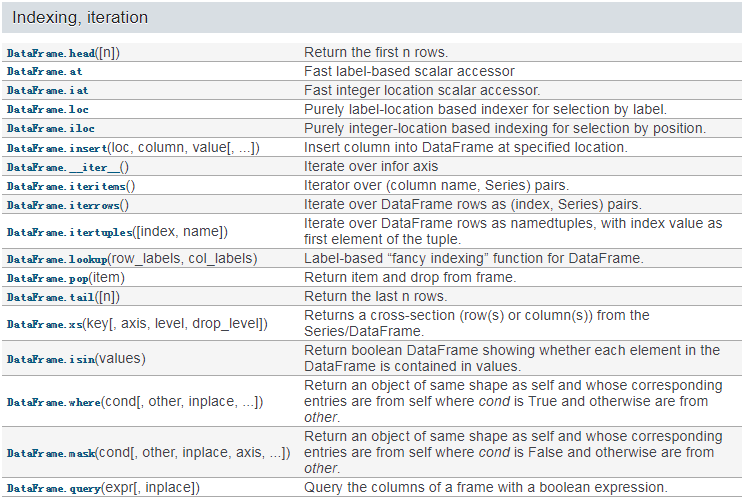

## 2.3 层次化索引

层次化索引是pandas的一项重要功能，它使数据表在一个轴上拥有多个（两个以上）索引级别。

**对于Series**

In [4]:
data=pd.Series(np.random.randn(10),index=[['a','a','a','b','b','b','c','c','d','d'],[1,2,3,1,2,3,1,2,2,3]])
print(data)
print(data.index)

a  1    0.402289
   2    0.505374
   3   -0.332167
b  1    0.003970
   2   -0.283437
   3   -0.563152
c  1   -0.233044
   2   -1.000647
d  2    0.757069
   3   -0.242333
dtype: float64
MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])


In [41]:
data.loc[['a','c'],[1]]

a  1    0.402289
c  1   -0.233044
dtype: float64

In [42]:
data.loc[:,[3]]

a  3   -0.332167
b  3   -0.563152
d  3   -0.242333
dtype: float64

选取子集

In [6]:
# print(data['b'])  #基于外层取数
# print(data['b':'c'])
# print(data[['b','d']])
data.loc[:,[1,3]]  #基于外层取数
data.loc[['a','c'],[1]]
# print(data[:,2])

a  1    0.402289
c  1   -0.233044
dtype: float64

In [7]:
data.unstack() #重塑

,1,2,3
a,0.402289,0.505374,-0.332167
b,0.003970,-0.283437,-0.563152
c,-0.233044,-1.000647,NaN
d,NaN,0.757069,-0.242333


In [8]:
data.unstack(0)

,a,b,c,d
1,0.402289,0.003970,-0.233044,NaN
2,0.505374,-0.283437,-1.000647,0.757069
3,-0.332167,-0.563152,NaN,-0.242333


层次化索引在数据重塑和基于分组的操作中扮演重要的角色。

**对于DataFrame**

In [9]:
frame=pd.DataFrame(np.arange(12).reshape(4,3),index=[['a','a','b','b'],[1,2,1,2]],
                   columns=[['Shenzhen','Shenzhen','Guangzhou'],['Red','Green','Red']])
frame

Shenzhen       Guangzhou
         Red Green       Red
a 1        0     1         2
  2        3     4         5
b 1        6     7         8
  2        9    10        11

In [10]:
frame.loc['a','Shenzhen']

,Red,Green
1,0,1
2,3,4


In [11]:
frame.loc['a',:].loc[2]

Shenzhen   Red      3
           Green    4
Guangzhou  Red      5
Name: 2, dtype: int32

In [45]:
frame

Shenzhen       Guangzhou
         Red Green       Red
a 1        0     1         2
  2        3     4         5
b 1        6     7         8
  2        9    10        11

In [51]:
frame.iloc[:3,1:2]

Shenzhen
       Green
a 1        1
  2        4
b 1        7

## 2.4 其他

查看是否有空值,用isna()和notna()或者isnull()和notnull()对应pandas的版本不同

In [18]:
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [24]:
df.isnull()

,id,date,city,category,age,price
one,False,False,False,False,False,False
two,False,False,False,False,False,True
three,False,False,False,False,False,False
four,False,False,False,False,False,False
five,False,False,False,False,False,True
six,False,False,False,False,False,False


In [25]:
df['price'].isnull()#判断是否有空值

one      False
two       True
three    False
four     False
five      True
six      False
Name: price, dtype: bool

In [55]:
df[df['price'].isnull()]

,id,date,city,category,age,price
two,1002,2013-01-03,Shanghai,100-B,44,NaN
five,1005,2013-01-06,Shanghai,210-A,34,NaN


In [56]:
df[~df['price'].isnull()]  # 拿出非空值的部分， ~ 表示反符号

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
three,1003,2013-01-04,Guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
six,1006,2013-01-07,Beijing,130-F,32,4432.0


In [59]:
df.loc[['two','three']].isnull()

,id,date,city,category,age,price
two,False,False,False,False,False,True
three,False,False,False,False,False,False


In [28]:
df['price'].isnull()#可以判断某一列

one      False
two       True
three    False
four     False
five      True
six      False
Name: price, dtype: bool

In [29]:
df['price'].notnull()#判断不是空值

one       True
two      False
three     True
four      True
five     False
six       True
Name: price, dtype: bool

查看某列的唯一值，用unique()

In [20]:
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [21]:
df['age'].unique()

array([23, 44, 54, 32, 34], dtype=int64)

In [60]:
df.loc['one'].unique()

array([1001, Timestamp('2013-01-02 00:00:00'), 'Beijing', '100-A', 23,
       1200.0], dtype=object)

判断是否在数据表中，用isin()

In [108]:
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [122]:
df['city']=df['city'].str.title().str.strip()
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,Sh,100-B,44,NaN
three,1003,2013-01-04,Guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,Shanghai,210-A,34,NaN
six,1006,2013-01-07,Beijing,130-F,32,4432.0


In [119]:
df['city']

one        Beijing
two             Sh
three    Guangzhou
four      Shenzhen
five      Shanghai
six        Beijing
Name: city, dtype: object

In [22]:
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [30]:
city = list(df['city'])
city[city.index('SH')] = 'Shanghai'
df['city'] = city
df['city']=df['city'].str.title().str.strip()
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,Shanghai,100-B,44,NaN
three,1003,2013-01-04,Guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,Shanghai,210-A,34,NaN
six,1006,2013-01-07,Beijing,130-F,32,4432.0


In [31]:
df['city'].value_counts() #频率统计

Shanghai     2
Beijing      2
Shenzhen     1
Guangzhou    1
Name: city, dtype: int64

In [33]:
from datetime import datetime
datetime(2018,8,19,23,19,19).weekday() #周日是6

6

In [34]:
from datetime import datetime
lis = [1001,datetime(2013,1,3),'Beijing','100-A',23,1200.0]
df.isin(lis) #查看df里面的每个元素是否在列表lis里面

,id,date,city,category,age,price
one,True,False,True,True,True,True
two,False,True,False,False,False,False
three,False,False,False,False,False,False
four,False,False,False,False,False,False
five,False,False,False,False,False,False
six,False,False,True,False,False,False


In [35]:
df.isin([1200,'Shenzhen'])

,id,date,city,category,age,price
one,False,False,False,False,False,True
two,False,False,False,False,False,False
three,False,False,False,False,False,False
four,False,False,True,False,False,False
five,False,False,False,False,False,False
six,False,False,False,False,False,False


针对选取的单列或Series中各值出现的频率，用value_counts函数。

In [123]:
df = pd.DataFrame({'id':[1001,1002,1003,1004,1005,1006], 
                   'date':pd.date_range('20130102', periods=6),
                   'city':['Beijing ', 'Shanghai', 'guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
                   'age':[23,44,54,32,34,32],
                   'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
                   'price':[1200,np.nan,2133,5433,np.nan,4432]},columns =['id','date','city','category','age','price'],
                   index = ['one','two','three','four','five','six'])
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,Shanghai,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [62]:
df['city'].str.upper().str.strip().value_counts()

SHANGHAI     2
BEIJING      2
SHENZHEN     1
GUANGZHOU    1
Name: city, dtype: int64

In [63]:
df['age'].value_counts()

32    2
23    1
54    1
44    1
34    1
Name: age, dtype: int64

In [ ]:
df['city'].str.upper().value_counts()#用upper进行字符串的大写，用value_counts()进行频数统计

# 3. 数据可视化

安装：
+ pip install matplotlib

## 3.1 matplotlib.pyplot

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1]:
%matplotlib inline

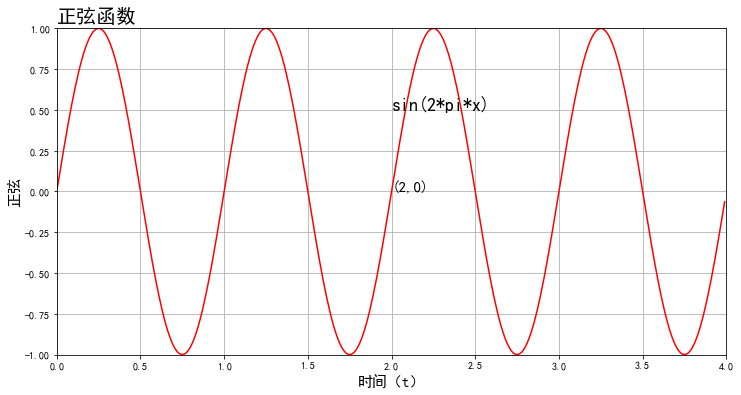

In [19]:
#plt.rcParams['font.sans-serif'] = ['Simhei']#中文显示
#plt.rcParams['axes.unicode_minus'] = False #显示符号
x = np.arange(0,4,0.01)
y = np.sin(2*np.pi*x)
plt.figure(figsize=(12,6))
plt.plot(x,y,'r') #画线
plt.title('正弦函数',fontsize=20,loc='left') #标题,左对齐，字体大小20
plt.xlim(0,4) #限制x轴范围0到4
plt.ylim(-1,1) #限制y轴范围-1到1
plt.grid() #显示网格
#plt.xticks(range(0,5,1)) #更改x轴的刻度
#plt.yticks(np.arange(-1,1.5,0.5))  #修改y轴刻度
plt.xlabel('时间（t）',fontsize=15) #x轴标签
plt.ylabel('正弦',fontsize=15) #x轴标签
plt.text(2,0.5,'sin(2*pi*x)',fontsize=18) #插入文本
plt.text(2,0,'(2,0)',fontsize=15)
plt.show()
# plt.savefig('pic1.jpg',dpi=300) #保存图片

matplotlib API函数都位于matplotlib.pyplot模块中，详情见[官方文档](https://matplotlib.org/api/pyplot_summary.html)。

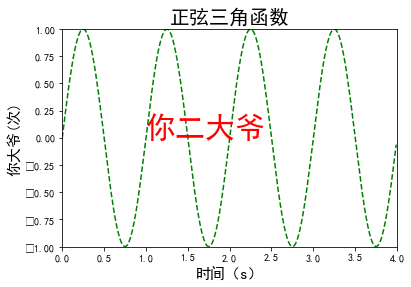

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif'] = ['Simhei']#中文显示
plt.rcParams['font.serif'] = ['KaiTi']#中文显示


t=np.arange(0,4,0.01)
s=np.sin(2*np.pi*t)

plt.plot(t,s,'g--')
plt.title('正弦三角函数',fontsize=20,color='k')
plt.xlim(0,4)
plt.ylim(-1,1)
plt.grid(False)
plt.xlabel('时间（s）',fontsize=15)
plt.ylabel('你大爷(次)',fontsize=15)
plt.text(1,0,'你二大爷',fontsize=30,color='r')
plt.savefig('你大爷.png',dpi=400)
plt.show()

In [151]:
import matplotlib.pyplot as plt #载入matplotlib.pyplot模块
import pandas as pd
import numpy as np

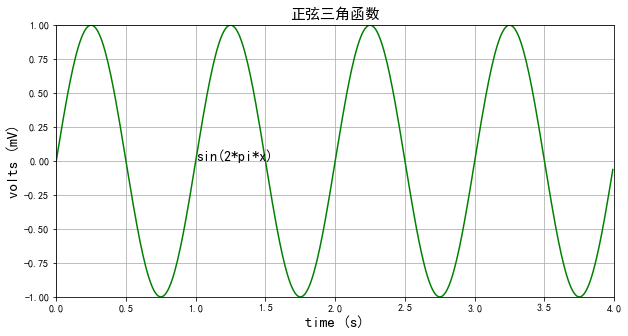

In [155]:
t = np.arange(0.0, 4.0, 0.01)
s = np.sin(2*np.pi*t)
plt.rcParams['font.sans-serif'] = ['Simhei']#中文显示
plt.rcParams['font.serif'] = ['KaiTi']#中文显示
plt.rcParams['axes.unicode_minus'] = False #显示符号

plt.figure(figsize=(10,5))#新建figure，设置图片的大小

plt.plot(t,s,'g')#画出图形
plt.title('正弦三角函数', fontsize=15)#设置标题
plt.text(1, 0, 'sin(2*pi*x)', fontsize=14)#设置文本
# plt.text(0.4, 0.6, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$',fontsize=18)#设置文本
plt.xlabel('time (s)',fontsize = 15)#x轴的标签
plt.ylabel('volts (mV)',fontsize=15)#y轴的标签
plt.grid(True)#设置网格
plt.xlim(0,4)#设置x轴方向的刻度范围
plt.ylim(-1,1)#设置y轴方向的刻度范围
plt.savefig('图片/MathPlot2.jpg',dpi=400,bbox_inches='tight')#保存图片

In [177]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, hold=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : array-like
        The wedge sizes.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels

([<matplotlib.patches.Wedge at 0x179280b8>,
 [Text(0.889919,0.646564,'Frogs'),
  Text(-0.172078,1.08646,'Hogs'),
  Text(-1.08646,-0.172078,'Dogs'),
  Text(0.646564,-0.889919,'Logs')],
 [Text(0.48541,0.352671,'20.00%'),
  Text(-0.0938607,0.592613,'15.00%'),
  Text(-0.592613,-0.0938607,'35.00%'),
  Text(0.352671,-0.48541,'30.00%')])

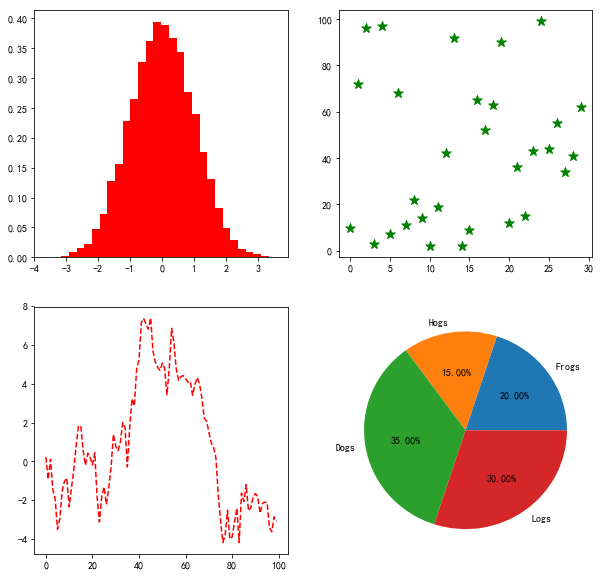

In [180]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig=plt.figure(figsize=(10,10))
ax=fig.subplots(2,2)

ax[0][0].hist(np.random.randn(10000),bins=30,density=True,color='r')#条形图
ax[0][1].scatter(np.arange(0,30),np.random.randint(1,100,size=30),color='g',marker='*',s=100)

ax[1][0].plot(np.random.randn(100).cumsum(),'r--')

labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
farg=[20,15,35,30]
ax[1][1].pie(x=farg,labels=labels,autopct='%.2f%%')

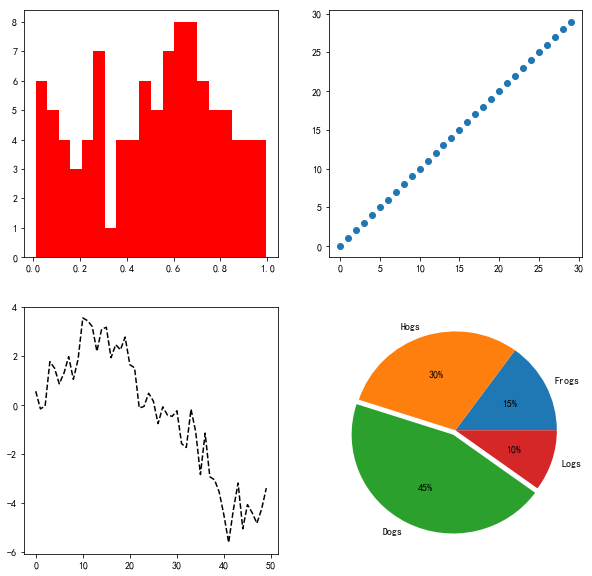

In [152]:
import matplotlib.pyplot as plt #载入matplotlib.pyplot模块
import pandas as pd
import numpy as np

fig2=plt.figure(figsize=(10,10))
ax= fig2.subplots(2, 2)
#fig2.subplots_adjust(wspace=0.2,left=0,right=0.5)

ax[0][0].hist(np.random.rand(100),bins=20,color='r',alpha=1)#条形图
ax[0][1].scatter(np.arange(30),np.arange(30))#散点图
ax[1][0].plot(np.random.randn(50).cumsum(),'k--')#线状图

labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
fracs = [15, 30, 45, 10]
explode = [0.00, 0.00, 0.05, 0]
ax[1][1].pie(fracs, explode=explode, labels=labels,autopct='%.0f%%')#饼状图
# plt.savefig('图片/MathPlot12.png',dpi=400,bbox_inches='tight')#保存图片
plt.show()

([<matplotlib.axis.XTick at 0x1a7095f8>,
 <a list of 5 Text xticklabel objects>)

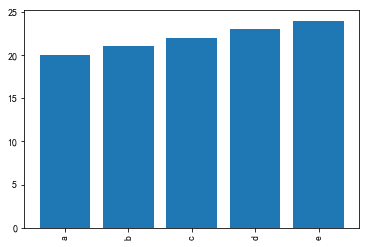

In [200]:
y=range(20,25)
x=range(0,5)
xtick=list('abcde')
plt.bar(x,y)
plt.xticks(x,xtick,rotation=90)

## 3.2 Pandas中的绘图函数

matplotlib实际上是一个比较低级的工具，要组装一张图，需要各种基础组件，如数据展示、图例、标题、刻度标签以及其他注释型信息。

在pandas中，有专门针对绘图的函数如下，详情见[官方网站](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)。

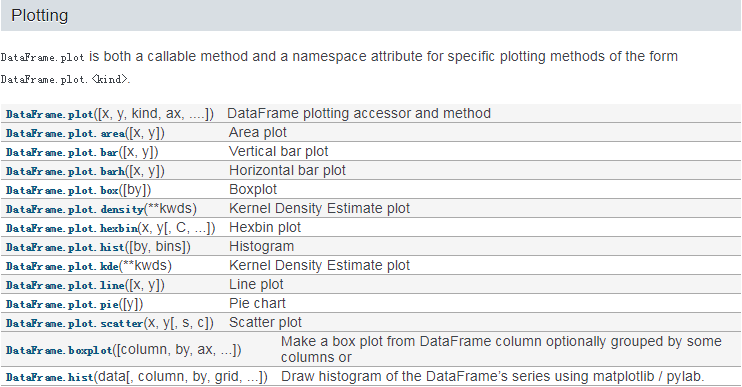

### 3.2.1 线状图

In [181]:
s=np.random.randn(10,4)
print(s)
s1=s.cumsum(1)
print(s1)

[[-0.4161769  -0.03594377  1.20323026 -1.02588885]
 [-0.9827837   0.54460948 -1.60678168  0.56877483]
 [ 0.6285035  -0.31884984  0.06819151  1.30379937]
 [-0.15676427 -2.0155983   0.40816866  1.98625572]
 [ 0.90897982 -0.10581468  0.22567389 -1.49374343]
 [ 0.1476277   1.201053    0.71581653  0.5781392 ]
 [-0.25992719  0.3047758  -0.00842034 -0.68483733]
 [ 0.54503959 -1.03902993 -1.87172687 -0.50686008]
 [ 0.85443204  0.95381707  1.96377686 -1.48405749]
 [ 0.27272442  0.37486438 -0.44442207 -1.04558316]]
[[-0.4161769  -0.45212067  0.75110959 -0.27477926]
 [-0.9827837  -0.43817422 -2.0449559  -1.47618108]
 [ 0.6285035   0.30965367  0.37784517  1.68164455]
 [-0.15676427 -2.17236257 -1.7641939   0.22206181]
 [ 0.90897982  0.80316515  1.02883904 -0.46490439]
 [ 0.1476277   1.34868069  2.06449723  2.64263643]
 [-0.25992719  0.04484861  0.03642828 -0.64840906]
 [ 0.54503959 -0.49399034 -2.36571721 -2.8725773 ]
 [ 0.85443204  1.80824911  3.77202597  2.28796848]
 [ 0.27272442  0.6475888   0.2

           A         B         C         D
0  -2.424014 -0.693960  0.369199 -0.680328
10 -1.744441 -1.395077  0.019512 -0.720432
20 -0.661972  0.361059  1.386900  0.466889
30 -0.178666 -0.431859  2.901779  0.315772
40  0.597242 -1.582812  3.289570  0.939554
50  0.242670 -0.699434  3.011385  0.566800
60 -0.697764 -0.935269  3.042303  2.234718
70  0.249760 -1.250103  0.922903  2.566012
80  0.465528 -0.542237  1.940772  3.303191
90  1.571243 -1.958755  1.611017  2.313719


(0, 100)

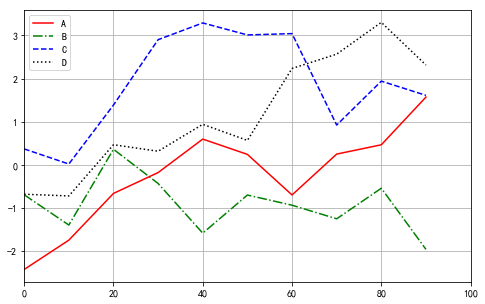

In [184]:
#plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题,或者转换负号为字符串
df = DataFrame(np.random.randn(10,4).cumsum(0),columns=list('ABCD'),index = np.arange(0,100,10))
print(df)
df.plot(kind='line',grid=True,style=['r-','g-.','b--','k:'],figsize=(8,5))#绘制线状图
plt.xlim(0,100)

### 3.2.2 柱状图

a    0.080197
b    0.935427
c    0.931955
d    0.283153
e    0.674509
f    0.665334
g    0.985375
h    0.482700
i    0.918166
j    0.379641
k    0.492910
l    0.648605
m    0.479404
n    0.194740
o    0.403550
p    0.943462
dtype: float64


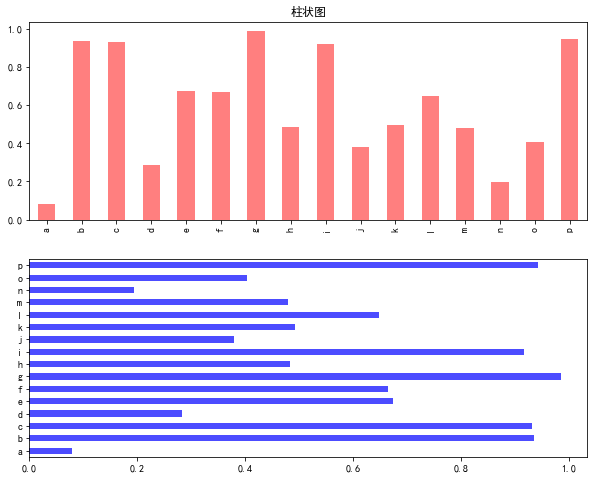

In [188]:
#plt.rcParams['font.sans-serif'] = ['KaiTi']
#plt.rcParams['font.serif'] = ['KaiTi']
fig2=plt.figure(figsize=(10,8))
ax= fig2.subplots(2, 1)
data = pd.Series(np.random.rand(16),index = list('abcdefghijklmnop'))
print(data)
data.plot(kind='bar',ax=ax[0],color='r',alpha=0.5,title='柱状图')
data.plot(kind='barh',ax=ax[1],color='b',alpha=0.7)

              A         B         C         D
one    0.680092  0.670899  0.749881  0.796923
two    0.992510  0.138407  0.939966  0.140896
three  0.214934  0.238613  0.150220  0.483514
four   0.125017  0.869324  0.067865  0.637772
five   0.917034  0.573866  0.117013  0.568485
six    0.488039  0.087259  0.895175  0.721660


[Text(0,0,'one'),
 Text(0,0,'two'),
 Text(0,0,'three'),
 Text(0,0,'four'),
 Text(0,0,'five'),
 Text(0,0,'six')]

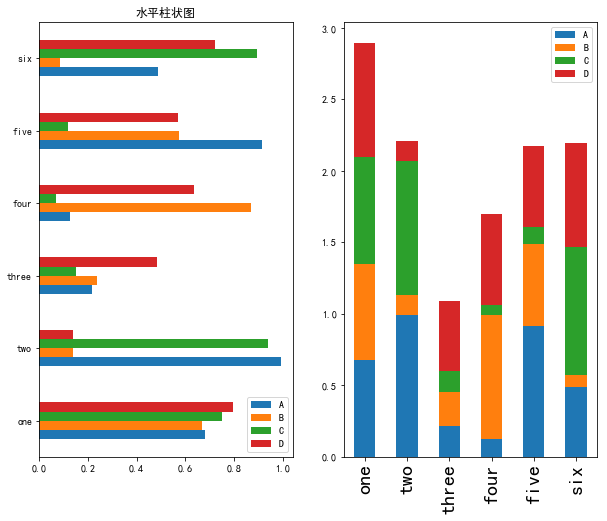

In [194]:
fig4 = plt.figure(figsize=(10,8))
ax=fig4.subplots(1,2)
df = DataFrame(np.random.rand(6,4),index=['one','two','three','four','five','six'],columns = list('ABCD'))
print(df)
df.plot(kind='barh',ax=ax[0],title='水平柱状图')
df.plot(kind='bar',ax=ax[1],stacked=True)#绘制堆积柱状图
ax[1].set_xticklabels(labels=list(df.index),rotation=90,fontsize=20)#设置x轴的刻度，改变旋转度，字体尺寸

### 3.2.3 直方图和密度图

安装Scipy：
+ pip install scipy

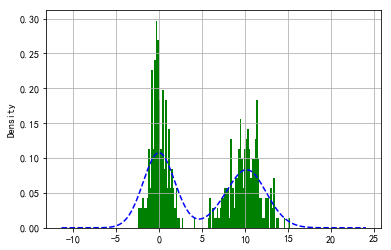

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
values.hist(bins=100,color='g',density=True)
values.plot(kind='kde',style='b--')
plt.grid(True)

# 练习

**作业：**

1.将'311-service-requests.csv'数据集加载到DataFrame中，查看数据集；

2.取出'Complaint Type'对应的列；

3.将'Complaint Type'列中的数值频数计算，并进行排序；(提示：求频数，用value_counts()函数)

4.针对排序好的数据，取出Top5；

5.针对Top5画出柱状图，并将图形保存。

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
Name: Complaint Type, dtype: int64
[14200, 7471, 7117, 5797, 5373]


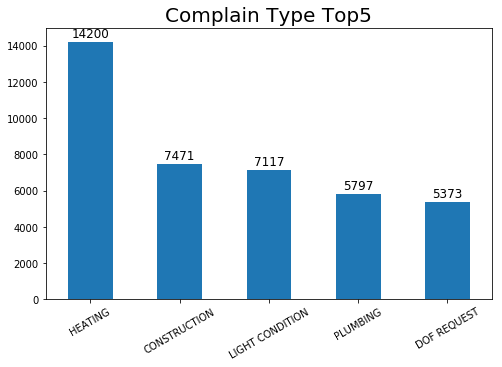

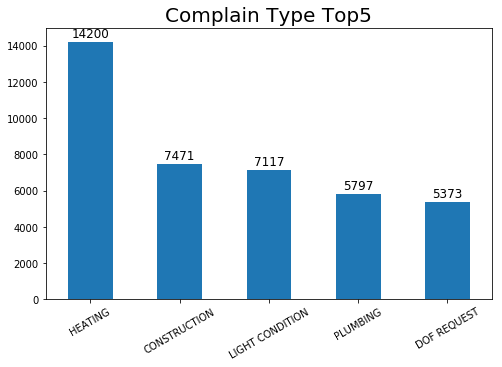

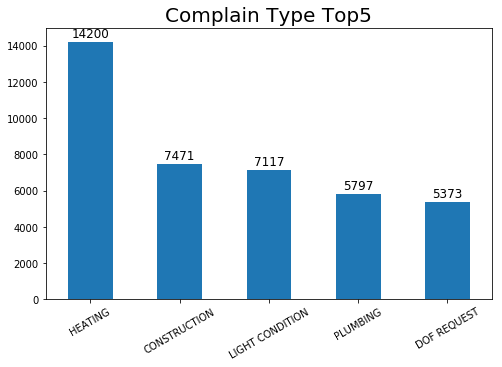

In [4]:
import matplotlib.pyplot as plt #载入matplotlib.pyplot模块
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(8,5))
complaints = pd.read_csv('data/311-service-requests.csv')
complaints['Complaint Type'].value_counts().head().plot(kind='bar')
data=complaints['Complaint Type'].value_counts().head()
print(data)
plt.xticks(range(len(data.index)),['HEATING','CONSTRUCTION','LIGHT CONDITION','PLUMBING','DOF REQUEST'],rotation=30,fontsize=10)
x=range(len(data.index))
y=list(data.values)
print(y)
#添加文本数字信息 
for a,b in zip(x,y):
    plt.text(a, b+100,str(b), ha='center', va= 'bottom',fontsize=12)
plt.title('Complain Type Top5',fontsize=20)
plt.ylim(0,15000)
plt.savefig('Image.png',dpi=300,bbox_inches='tight')
plt.show()